# Linear regression
A simple linear regression model that predict a person's weight from its height

In [42]:
# imports
import pandas as pd
import numpy as np


In [43]:
# read dataset
filename = "datasets/SOCR-HeightWeight"
df = pd.read_csv(f"{filename}.csv", usecols=[1,2], header=0, names=["height", "weight"])
print(df)


     height  weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[500 rows x 2 columns]


In [44]:
# useful functions
def split_train_test(df, n):
    """
    Takes a dataframe and the number of data in the train set.
    Returns a list of dataframes.
    """
    train = df.iloc[0:n, :]
    test = df.iloc[n:len(df), :]
    return train, test


In [45]:
# split dataset into train and test
train_df, test_df = split_train_test(df, 300)

print(train_df)
print(test_df)

# create array-like objects for train and test data
x_train = train_df["height"]
y_train = train_df["weight"]

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = test_df["height"]
y_test = test_df["weight"]

x_test = np.array(x_test)
y_test = np.array(y_test)


     height  weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
295     160     156
296     169      88
297     140      76
298     187      92
299     151      82

[300 rows x 2 columns]
     height  weight
300     186     140
301     182     108
302     188      81
303     179     110
304     156     126
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[200 rows x 2 columns]


## Train the model

In [49]:
# set initial values for learnable parameters
a = 1
b = 0

lr = 0.000005
epochs = 5000

n = len(x_train)

for i in range(epochs):
    y = a*x_train + b
    error = y - y_train
    loss = np.sum(error**2)/n
    loss_a = 2*np.sum(error*x_train)/n
    loss_b = 2*np.sum(error)/n
    a = a - loss_a*lr
    b = b - loss_b*lr
    print(f"loss: {loss} \t({i+1}/{epochs})")
    

loss: 5311.336666666667 	(1/5000)
loss: 3202.435856297022 	(2/5000)
loss: 2146.3079103604473 	(3/5000)
loss: 1617.403828653932 	(4/5000)
loss: 1352.5310612075561 	(5/5000)
loss: 1219.8839755628646 	(6/5000)
loss: 1153.4549102197118 	(7/5000)
loss: 1120.1875283930167 	(8/5000)
loss: 1103.5273669066155 	(9/5000)
loss: 1095.184025864334 	(10/5000)
loss: 1091.0057106892602 	(11/5000)
loss: 1088.9132215328034 	(12/5000)
loss: 1087.8653045635685 	(13/5000)
loss: 1087.3405045967013 	(14/5000)
loss: 1087.077679246346 	(15/5000)
loss: 1086.9460495929118 	(16/5000)
loss: 1086.8801221480355 	(17/5000)
loss: 1086.847098070501 	(18/5000)
loss: 1086.8305518497423 	(19/5000)
loss: 1086.8222576647443 	(20/5000)
loss: 1086.8180960617399 	(21/5000)
loss: 1086.8160040370115 	(22/5000)
loss: 1086.8149484476762 	(23/5000)
loss: 1086.814411900475 	(24/5000)
loss: 1086.8141352872162 	(25/5000)
loss: 1086.813988847696 	(26/5000)
loss: 1086.8139075985935 	(27/5000)
loss: 1086.8138589965574 	(28/5000)
loss: 108

In [50]:
print(f"a: {a}")
print(f"b: {b}")

a: 0.6196005498037838
b: 0.0422885344609411


## Test the model

In [51]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


R2 Score: -0.12175529996901724


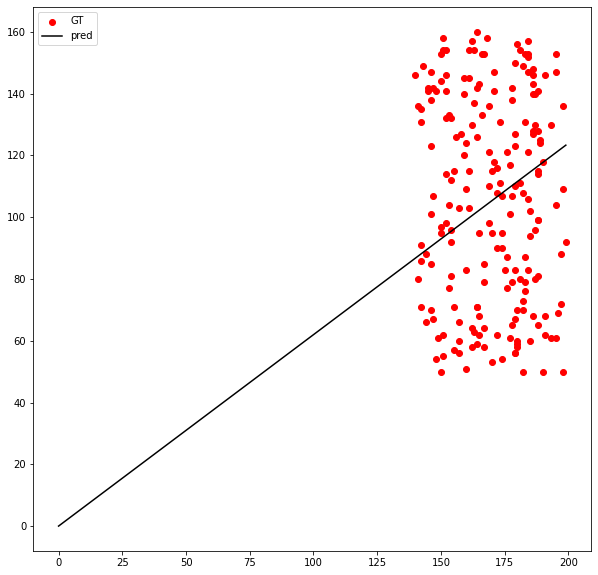

In [53]:
y_prediction = a*x_test + b
print(f"R2 Score: {r2_score(y_test, y_prediction)}")

y_plot = []
for i in range(200):
    y_plot.append(b + a * i)
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color='red', label='GT')
plt.plot(range(len(y_plot)), y_plot, color='black', label='pred')
plt.legend()
plt.show()
